# Prediction Model using TuriCreate in Julia

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set Up</a></span></li><li><span><a href="#Fetch-Data-(SFrame)-from-Uber-CSV" data-toc-modified-id="Fetch-Data-(SFrame)-from-Uber-CSV-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fetch Data (SFrame) from Uber CSV</a></span></li><li><span><a href="#Split-Data" data-toc-modified-id="Split-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Split Data</a></span></li><li><span><a href="#Evaluate-the-Model" data-toc-modified-id="Evaluate-the-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluate the Model</a></span></li><li><span><a href="#Save-/-Export-the-Model" data-toc-modified-id="Save-/-Export-the-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Save / Export the Model</a></span></li><li><span><a href="#Make-predictions" data-toc-modified-id="Make-predictions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Make predictions</a></span><ul class="toc-item"><li><span><a href="#Explore-SFrame" data-toc-modified-id="Explore-SFrame-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Explore SFrame</a></span></li></ul></li></ul></div>

## Set Up

In [1]:
column_to_predict = "DJIA_Original"
# column_to_predict = "AAPL_Original"
# column_to_predict = "VIX_Original"

## uncomment for the first run
# import Pkg
# Pkg.add("PyCall")
# Pkg.add("Conda")
# ENV["PYTHON"] = "/opt/anaconda3/envs/turi/bin/python"
# /opt/anaconda3/envs/turi/lib/python3.6/site-packages/
# Pkg.build("PyCall")

include("../Julia/functions.jl") 

In [2]:
using PyCall
tc = pyimport("turicreate")

PyObject <module 'turicreate' from '/opt/anaconda3/envs/turi/lib/python3.6/site-packages/turicreate/__init__.py'>

## Fetch Data (SFrame) from Uber CSV

In [3]:
data_path="../DATA/processed/uber_training.csv"
data = tc.SFrame(data_path)
println()

Finished parsing file /Users/uki/REPOS/MarketIndicators.jl/src/DATA/processed/uber_training.csv
Parsing completed. Parsed 100 lines in 0.026811 secs.
------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
Finished parsing file /Users/uki/REPOS/MarketIndicators.jl/src/DATA/processed/uber_training.csv
Parsing completed. Parsed 1786 lines in 0.012071 secs.



## Split Data

In [4]:
# Make a train-test split
train_data, test_data = data.random_split(0.8)
println()

In [5]:
println( size(train_data) )
println( size(test_data)  )

(1447,)
(339,)


In [6]:
model = tc.regression.create( 
    train_data, 
    target = column_to_predict, 
    features = [

    #"VIX_Quantized"
    "VIX_Avg030"
    ,"VIX_Avg060"
    ,"VIX_Avg090"
    ,"VIX_Avg120"
    ,"VIX_Avg180"
    ,"VIX_Avg365"
        
    ,"US_ISM_MFC_PMI_Quantized"
    ,"US_ISM_MFC_PMI_Avg030"
    ,"US_ISM_MFC_PMI_Avg060"
    ,"US_ISM_MFC_PMI_Avg090"
    ,"US_ISM_MFC_PMI_Avg180"
    ,"US_ISM_MFC_PMI_Avg365"
        
    # ,"DJIA_Quantized" # comment out when predicting DJIA
    ,"DJIA_Avg030"
    ,"DJIA_Avg060"
    ,"DJIA_Avg090"
    ,"DJIA_Avg120"
    ,"DJIA_Avg180"
    ,"DJIA_Avg365"
        
    ,"AAPL_Quantized" # replace with 5 day average
    ,"AAPL_Avg030"
    ,"AAPL_Avg060"
    ,"AAPL_Avg090"
    ,"AAPL_Avg120"
    ,"AAPL_Avg180"

    ,"US_ISM_MFC_EMP_Quantized"
    ,"US_ISM_MFC_EMP_Avg030"
    ,"US_ISM_MFC_EMP_Avg060"
    ,"US_ISM_MFC_EMP_Avg090"
    ,"US_ISM_MFC_EMP_Avg120"
    ,"US_ISM_MFC_EMP_Avg180"
    ,"US_ISM_MFC_EMP_Avg365"
        
        
    ,"US_INIT_JOBLESS_Quantized"
    ,"US_INIT_JOBLESS_Avg005"
    ,"US_INIT_JOBLESS_Avg030"
    ,"US_INIT_JOBLESS_Avg060"
    ,"US_INIT_JOBLESS_Avg090"
    ,"US_INIT_JOBLESS_Avg120"
    ,"US_INIT_JOBLESS_Avg180"
    
        ], 
    validation_set="auto", 
    verbose=true
)

Automatically generating validation set from 5% of the data.
Linear regression:
--------------------------------------------------------
Number of examples          : 1378
Number of features          : 38
Number of unpacked features : 38
Number of coefficients    : 39
Starting Newton Method
--------------------------------------------------------
+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+
| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |
+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+
| 1         | 2        | 1.021909     | 1786.318235        | 823.286302           | 411.162907                      | 342.241340                        |
+-----------+----------+-----------

PyObject Class                          : LinearRegression

Schema
------
Number of coefficients         : 39
Number of examples             : 1378
Number of feature columns      : 38
Number of unpacked features    : 38

Hyperparameters
---------------
L1 penalty                     : 0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 1.0313

Settings
--------
Residual sum of squares        : 232957701.9598
Training RMSE                  : 411.1629

Highest Positive Coefficients
-----------------------------
(intercept)                    : 21137.0284
AAPL_Avg180                    : 68.3289
DJIA_Avg030                    : 63.4133
US_ISM_MFC_PMI_Avg365          : 62.7632
DJIA_Avg120                    : 58.7551

Lowest Negative Coefficients
----------------------------
DJIA_Avg365          

## Evaluate the Model

In [7]:
#TODO: write this in a loop to select the best model
# Evaluate the model and save the results into a dictionary
results = model.evaluate( test_data ) #test_data[0:2531]
results

Dict{Any,Any} with 2 entries:
  "rmse"      => 373.941
  "max_error" => 1339.76

In [8]:
rmse = results["rmse"]
rmse = round(rmse, digits=2)

max_error = results["max_error"]
max_error = round(max_error, digits=2)

println( "max_error: ", max_error, ", rmse: ", rmse )
# max_error: 1069.27, rmse: 184.6
# max_error: 65.35, rmse: 32.6            predict: ^DJIA added: US_INIT_JOBLESS
# max_error: 1875.39, rmse: 443.59        predict: ^DJIA commented out: "DJIA_Quantized"
# max_error: 1339.76, rmse: 373.94        predict: ^DJIA commented out: "DJIA_Quantized"

max_error: 1339.76, rmse: 373.94


## Save / Export the Model

In [9]:
# Export to Core ML
model.export_coreml("../DATA/models/^DJI.mlmodel")

## Make predictions 

In [10]:
data_path="../DATA/processed/uber_prediction.csv"
data_predictions = tc.SFrame(data_path)
println()

Finished parsing file /Users/uki/REPOS/MarketIndicators.jl/src/DATA/processed/uber_prediction.csv
Parsing completed. Parsed 96 lines in 0.024831 secs.
------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
Finished parsing file /Users/uki/REPOS/MarketIndicators.jl/src/DATA/processed/uber_prediction.csv
Parsing completed. Parsed 96 lines in 0.005859 secs.



In [11]:
## Save predictions to an SArray
predictions = model.predict(data_predictions)
get(predictions, 1)

27942.334915533404

### Explore SFrame

In [12]:
record_count = size(data_predictions)[1]
row = get(data_predictions, record_count-1)

feature_number = row.count
day = row["Rata_Die"]
date = row["Date"] # "2020-10-20"
original = row["DJIA_Original"]

println( "record_count data ", record_count )
println( "record_count predictions ", size(predictions)[1] )

println( "feature_number ", feature_number )
println( "Rata Die ", day )
println( "date ", date )
println( "original ", original )

record_count data 96
record_count predictions 96
feature_number 47
Rata Die 737770
date 2020-12-11
original 30218.259766


In [13]:
using Dates
today_rata = Dates.datetime2rata( today() )

737765

In [14]:
## Determine dataset size

initio = 1                                              # latin: start
finem  = size(predictions)[1] -1                        # latin: end
gradus = convert(Int64, round( finem/20, digits=0)  )   # latin: step

println("preditions set size: ", finem, ", step ", gradus)

preditions set size: 95, step 5


In [15]:
using Dates

## Declare variables
x_axis_dates      = Vector{Date}() # results in Array{Date,1}
y_axis_original   = Vector{Float64}()
y_axis_predicted  = Vector{Float64}()

println(column_to_predict, " ", finem, " ", typeof(x_axis_dates))

today_id  = 50 # not set yet

## step thru each prediction
for id in initio:finem
    row = get(data_predictions, id) # get a dictionary of data from the SFrame
    
    date_string = row["Date"] # e.g. "2020-10-20"
    date = Date(date_string) # 2020-09-07 Date
    if date == today()
        today_id = id
    end 
    #date = Dates.format(date, "u.d,yy" )
    #println("date ", date, " ", typeof(date))
    push!(x_axis_dates, date)
    
    predicted = get(predictions, id) # Float64
    predicted = round(predicted, digits=0)
    #println("predicted ", predicted, " ", typeof(predicted))
    append!(y_axis_predicted, predicted)
    
    
    original = row[ column_to_predict ]
    original = round(original, digits=0) # Float64
    #println("original ", original, " ", typeof(original)) 
    append!(y_axis_original, original)
end

## Format Dates for plotting
include("../Julia/function_format_dates.jl")
x_axis_dates = format_dates(x_axis_dates, "u.d,yy")
println()

DJIA_Original 95 Array{Date,1}



In [16]:
t = today()# Date
t = format_dates([t], "u.d,yy") # Array{String,1}
t = t[1] # String
println("t ", t, " ", typeof(t))

t Dec.6,20 String


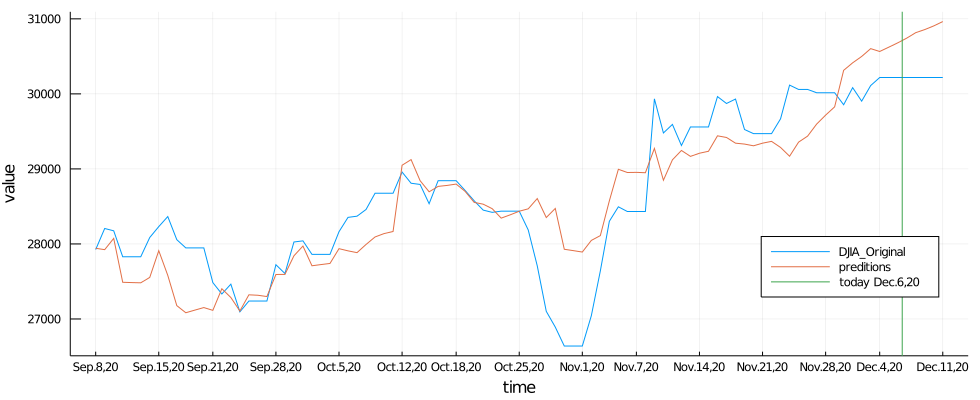

In [17]:
using Plots

#dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(    x_axis_dates,
        [  y_axis_original y_axis_predicted 
        ], # y-axis
    label    = 
        [ column_to_predict "preditions"  "" ],
    legend   =:bottomright, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "value",
    size     = (980, 400), # width, height
    layout = (1, 1), # number of graphs: vertically, horizontally
    )
## Add veritical today line
plot!([today_id], seriestype="vline", label=[ "today "*t "" ],)

In [18]:
savefig("../../predictions.png")

In [19]:
savefig("../../predictions_" * column_to_predict * ".png")

In [20]:
## print prediction comparisons
#println(today_id)

for id in finem-10:finem
    if id < today_id + 2
        row = get(data_predictions, id) # get a dictionary of data from the SFrame
        date_string = row["Date"] # e.g. "2020-10-20"
        
        a = y_axis_predicted[id]
        b = y_axis_original[id]
        d = round(b-a, digits=3)
        date = convert(String, Dates.format( Date(date_string), "e, u. dd, yyyy" ) )
        if id < today_id
            println( date, "\t predicted ", a , "\t, but actual value was \t", b , "\t difference is ",  d  ) # di
        else
            println( date, "\t predicted ", a  ) # di
        end # if
    end #if 
end

Tue, Dec. 01, 2020	 predicted 30414.0	, but actual value was 	30083.0	 difference is -331.0
Wed, Dec. 02, 2020	 predicted 30499.0	, but actual value was 	29903.0	 difference is -596.0
Thu, Dec. 03, 2020	 predicted 30603.0	, but actual value was 	30111.0	 difference is -492.0
Fri, Dec. 04, 2020	 predicted 30565.0	, but actual value was 	30218.0	 difference is -347.0
Sat, Dec. 05, 2020	 predicted 30622.0	, but actual value was 	30218.0	 difference is -404.0
Sun, Dec. 06, 2020	 predicted 30680.0
Mon, Dec. 07, 2020	 predicted 30743.0
